In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.linear_model import LinearRegression  

In [27]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv") 

In [38]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [45]:
x_train, x_val, y_train, y_val = train_test_split(data.iloc[:, :-1].values,  data.iloc[:, 1].values, test_size=0.2)

In [46]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In [47]:
y_pred = regressor.predict(x_val)

In [48]:
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,76,68.175836
1,35,39.679306
2,95,86.560694
3,85,75.529779
4,25,29.567634


In [54]:
hours = 9.25
own_pred = regressor.predict(np.array([hours]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 89.77804392642258


In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_val, y_pred)) 

Mean Absolute Error: 6.9961263126073305


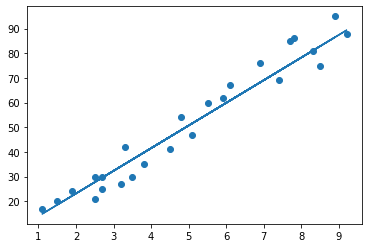

In [56]:
import matplotlib.pyplot as plt  
%matplotlib inline
# Plotting the regression line
line = regressor.coef_*data.iloc[:, :-1]+regressor.intercept_

# Plotting for the test data
plt.scatter(data.iloc[:, :-1], data.iloc[:, 1])
plt.plot(data.iloc[:, :-1], line);
plt.show()